# Loss functions

## Parametrized models
Many machine learning models have the form $\hat{y} = g(x, \theta)$, where the function $g$ fixes the structure of the problem and $\theta$ is a set of parameters.
For example a linear regression model:
$\hat{y} = g(x,\theta) = \theta_1 x_1 + \dots + \theta_d x_d.$

Choosing a particular $\theta$ given some training data
$x_1, \dots, x_n, y_1, \dots, y_n$ is called training or fitting the model to the data.
For example in the linear regression model we train the model using least squares, i.e., choose $\theta$ to minimize:
$\sum_i^n (\hat{y}_i - y_i)^2 = \sum_i^n (g(x, \theta) - y_i)^2$

## Loss function
A loss function $l(\hat{y}, y) : \mathbb{R}^{m} \times \mathbb{R}^{m} → \mathbb{R}$ quantifies how close is $\hat{y}$ to $y$, i.e. how good is our model in fitting the data. First, we define the residuals as $r = \hat{y} - y$, i.e., the difference between the predicted and observed values. Note, that some literature defines residuals in reversed order as $y - \hat{y}$.

Examples of loss functions:
*   quadratic loss: $l(\hat{y}, y) = (\hat{y} - y)^2$
*   absolute loss: $l(\hat{y}, y) = \lvert \hat{y} - y \rvert$

The empirical risk is the average loss over data points,
$\mathcal{L}(\theta)=\frac{1}{n}\sum_i^n l(\hat{y}_i, y_i) = \frac{1}{n}\sum_i^n l(g(x_i,\theta),y_i)$.

Finding the best $\theta$ (fitting the model)is also denoted as empirical risk minimization (ERM).


The above was a short recap of the slides. Below we have dataset on which we will train regression models with diferent loss functions and see, how the predictions change based on the loss function.

## Quantile regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

First, we will generate heteroscedastic data, i.e., data with non-constant variance, where the variance of the data will grow with $x$ values.

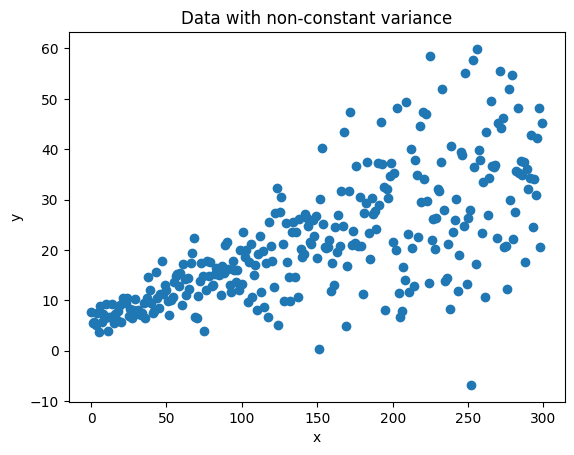

In [8]:
## Generate some data with non-constant variance
np.random.seed(1)
x_ = np.arange(300).reshape(-1,1)
intercept_ = 6
slope_ = 0.1
## Non constant variance
var_ = 1 + 0.05 * x_
## non constant error
error_ = np.random.normal(size = (x_.size,1), loc = 0.0, scale = var_)
## Regression equation
y_ = intercept_ + slope_ * x_ + error_

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Data with non-constant variance")

In the cell below, we fit a linear regression and visualise the fit.

Mean squared error: 82.14
Variance score: 0.49


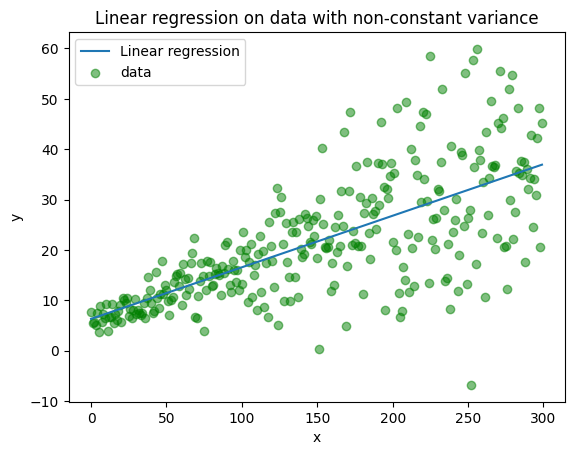

In [9]:
## Try to fit a linear regression
model_LR = LinearRegression(fit_intercept = True)
model_LR.fit(x_, y_)

y_pred_lin_reg = model_LR.predict(x_)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred_lin_reg - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model_LR.score(x_, y_)))

## Plot the regression
plt.figure(4)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_, y_pred_lin_reg, label="Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
plt.legend()
_ = plt.title("Linear regression on data with non-constant variance")

Below, we fit a Quantile regression model with $\tau = 0.5$ to the heteroskedastic data and again visualize the fit

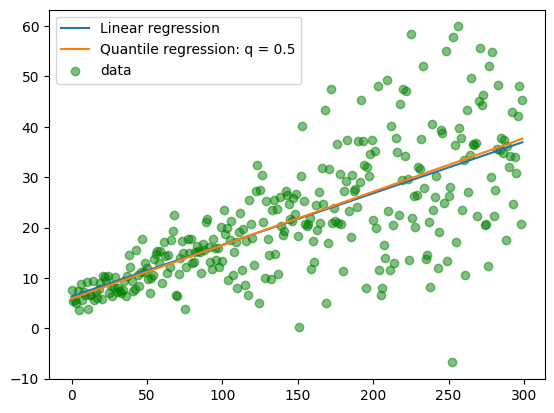

In [10]:
from sklearn.linear_model import QuantileRegressor
qr = QuantileRegressor(quantile=0.5, alpha=0, solver = "highs")
y_pred = qr.fit(x_, y_.flatten()).predict(x_)


plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.plot(x_, y_pred, label=f"Quantile regression: q = 0.5")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()

We can see that the fits are almost identical.
Compare the RMSE (`mean_squared_error` with `squared=False`)
 and MAE (`mean_absolute_error`) of the models. Which model has a lower RMSE? Which model has a lower MAE?

Your task here is to calculate the RMSE and MAE for the estimates of linear regression (LR) and the estimates of quantile regression (QR).

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

print(f"RMSE LR: {root_mean_squared_error(y_, y_pred_lin_reg):.3f} MAE LR: {mean_absolute_error(y_, y_pred_lin_reg):.3f}")
print(f"RMSE QR: {root_mean_squared_error(y_, y_pred):.3f} MAE QR: {mean_absolute_error(y_, y_pred):.3f}")
print("Model with lowest MSE: LR, model with lowest MAE: QR")

RMSE LR: 9.063 MAE LR: 6.360
RMSE QR: 9.070 MAE QR: 6.352
Model with lowest MSE: LR, model with lowest MAE: QR


Using quantile regression, we are able to determine a line dividing the response values into $\tau$ quantiles. Below, we have an example for $\tau=0.1$ and $\tau=0.9$, bounding 80% of the data.

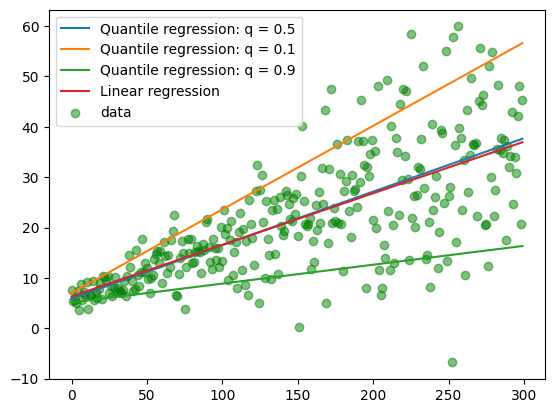

In [12]:
qr_10 = QuantileRegressor(quantile=0.9, alpha=0, solver = "highs") # 0.1 quantile regression
qr_90 = QuantileRegressor(quantile=0.1, alpha=0, solver = "highs") # 0.9 quantile regression
y_pred_05 = qr_10.fit(x_, y_.reshape(-1)).predict(x_)
y_pred_95 = qr_90.fit(x_, y_.reshape(-1)).predict(x_)

plt.plot(x_, y_pred, label=f"Quantile regression: q = 0.5")
plt.plot(x_, y_pred_05, label=f"Quantile regression: q = 0.1")
plt.plot(x_, y_pred_95, label=f"Quantile regression: q = 0.9")
plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()


Now try to add the lines covering 90% of the $y$ values to the plot, i.e., 90% confidence intervals for the response. To calculate the lines select the right values of $\tau$ paremeter in the quantile regression. Finally, plot the lines and the data.

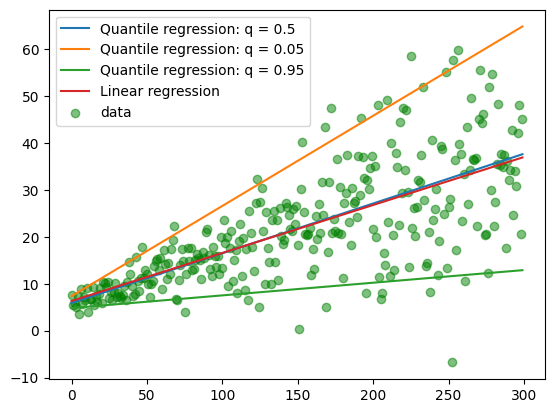

In [13]:
qr_05 = QuantileRegressor(quantile=0.95, alpha=0, solver="highs")  # 0.05 quantile regression
qr_95 = QuantileRegressor(quantile=0.05, alpha=0, solver="highs")  # 0.95 quantile regression
y_pred_05 = qr_05.fit(x_, y_.reshape(-1)).predict(x_) # fit qr_05 and get estimate for training data
y_pred_95 = qr_95.fit(x_, y_.reshape(-1)).predict(x_) # fit qr_95 and get estimate for training data

plt.plot(x_, y_pred, label=f"Quantile regression: q = 0.5")
plt.plot(x_, y_pred_05, label=f"Quantile regression: q = 0.05")
plt.plot(x_, y_pred_95, label=f"Quantile regression: q = 0.95")
plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()

Good job! Around 90% of the data should lie between the green and orange line.

**Optional task:**
If you have some time left, add more Quantile regession estimates to get approximate distribution of the data.

In [ ]:
# more q's with plot

Now, let us check the plots of histograms.

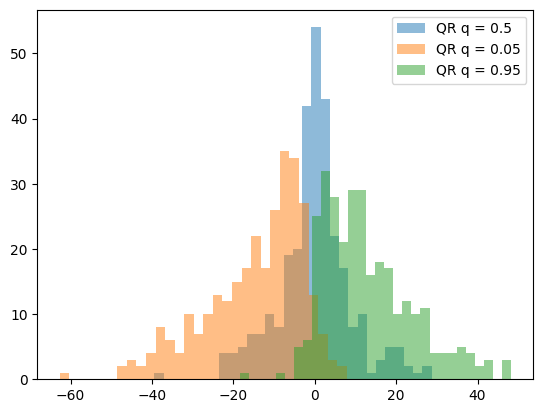

In [14]:
plt.hist(y_.flatten() - y_pred, bins = 30, alpha =0.5, label = 'QR q = 0.5')
plt.hist(y_.flatten() - y_pred_05, bins = 30, alpha =0.5, label = 'QR q = 0.05')
plt.hist(y_.flatten() - y_pred_95, bins = 30, alpha =0.5, label = 'QR q = 0.95')
# plt.hist(y_ - y_pred_lin_reg, bins = 30, alpha =0.5, label = 'Linear regression')
plt.legend(loc='upper right')
plt.show()

## Huber regression
In this part, we will use regression with huber loss function, that combines squared loss function for lower values and linear loss function for higher values, based on the $\epsilon$ parameter.
\begin{equation}
L_{\alpha}=
    \left\{\begin{matrix}
        r^{2} & if \left| r  \right| < \epsilon\\
        \epsilon (2|r| -  \epsilon) & \text{otherwise}
    \end{matrix}\right.
\end{equation}

Source: https://bmcsystbiol.biomedcentral.com/articles/10.1186/1752-0509-8-S3-S1/figures/9

Plot of squared error (SE) vs Huber loss:

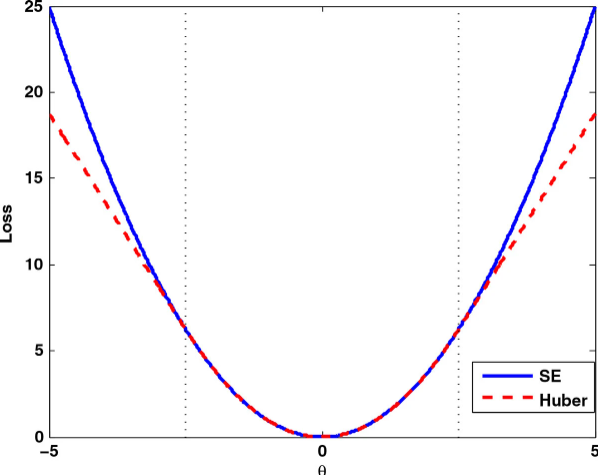

In [15]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

This example was taken from the [Machine learning mastery blog](
https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/). First, create a function that generates data with outliers.

In [16]:
def get_dataset():
  X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
  # add some artificial outliers
  np.random.seed(1)
  for i in range(10):
    factor = np.random.randint(2, 4)
    if np.random.random() > 0.5:
      X[i] += factor * X.std()
    else:
      X[i] -= factor * X.std()
  return X, y

Often, if we have outliers in the data, we try threat them as incorrect values and omit or replace them. However, this way we can omit important observations. Alternative way of handling data containing outliers is to user robust loss functions, which do not get influenced by the outliers as much as for example squarred loss.

First, we define a function `evaluate_model` that uses a repeated k-fold crossvalidation to evaluate a model. It performs validations with 3 folds to get more samples of the models and hence more reliable results.  

In [17]:
# evaluate a model
def evaluate_model(X, y, model):
 # define model evaluation method
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
 return np.abs(scores)

# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
 # fut the model on all data
 model.fit(X, y)
 # plot the dataset
 plt.scatter(X, y)
 # plot the line of best fit
 xaxis = np.arange(X.min(), X.max(), 0.01)
 yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
 plt.plot(xaxis, yaxis, color='r')
 # show the plot
 plt.title(type(model).__name__)
 plt.show()

First, we fit the model using linear regression and plot the results.

Mean MAE 5.030, (std:1.408)


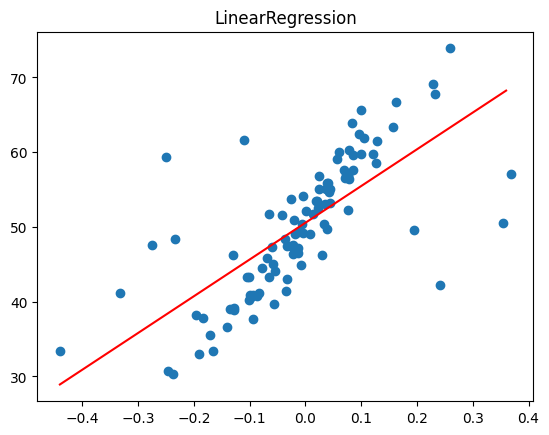

In [24]:
# load dataset
X, y = get_dataset()

model_lr = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model_lr)
print(f"Mean MAE {np.mean(results):.3f}, (std:{np.std(results):.3f})")
# plot the line of best fit
plot_best_fit(X, y, model_lr)

In the cell below define create a new instance of `HuberRegressor` with `epsilon` parameter setting the boundary for Huber loss equalt to 1 and `alpha` parameter controlling the amount of regularization equal to 0. The Huber loss is an example of loss function robust to outliers.

Mean MAE 4.284, (std:1.930)


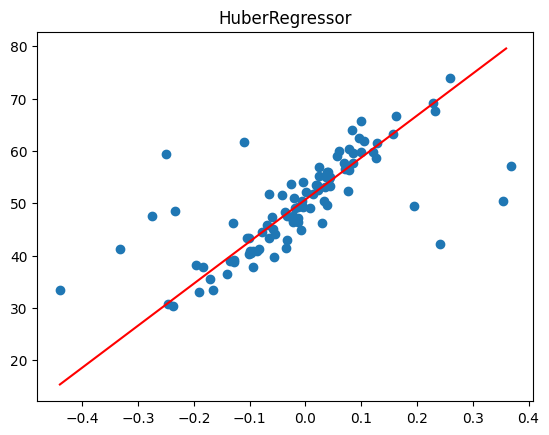

In [25]:

# define the model by calling the constructor
model_hr = HuberRegressor(epsilon=1, alpha=0)
# evaluate model by calling the  evaluate_model function
results = evaluate_model(X, y, model_hr)
print(f"Mean MAE {np.mean(results):.3f}, (std:{np.std(results):.3f})")
# plot the line of best fit
plot_best_fit(X, y, model_hr)

Finally, you can compare the QuantileRegression model and compare its fit to Huber regressor.

Mean MAE 4.280, (std:1.929)


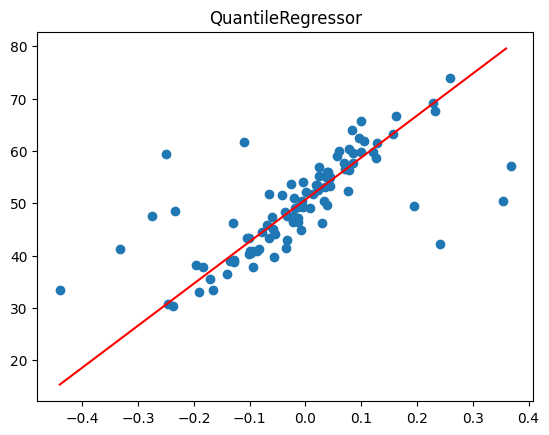

In [26]:
# define quantile regression model
model_QR = QuantileRegressor(quantile=0.5, alpha=0, solver="highs")
# evaluate model
results = evaluate_model(X, y, model_QR)
print(f"Mean MAE {np.mean(results):.3f}, (std:{np.std(results):.3f})")
# plot the line of best fit
plot_best_fit(X, y, model_QR)

Below define and describe the histograms of the residuals of the models.

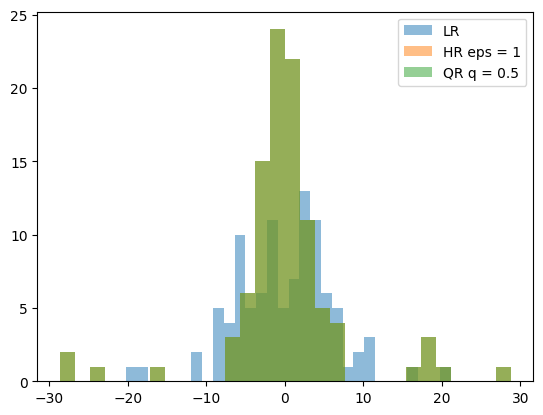

In [33]:
plt.hist(y - model_lr.predict(X), bins = 30, alpha =0.5, label = 'LR')
plt.hist(y - model_hr.predict(X), bins = 30, alpha =0.5, label = 'HR eps = 1')
plt.hist(y - model_QR.predict(X), bins = 30, alpha =0.5, label = 'QR q = 0.5')
plt.legend(loc='upper right')
plt.show()

Which of the three used loss functions appear as robust to outliers? How did you notice this robustness? Print your answer below.

In [34]:
#lr